## Mathematical Calculation

In [1]:
# Importing necessary libraries
import math
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

gamma = 1.26
c = float(input("Enter charge mass in grams\n"))
w = float(input("Enter weight of seat-man combination in kg\n"))
k = float(input("Enter chamber volume in m^3\n"))

# Calculating value of a
def calculate_a():
    return 6823 * (c/w)**0.5 * (27.68 * (c/k))**((gamma-1)/2)

a = calculate_a()
print("a = ", a, " ft\n")

theta_f = float(input("Enter form factor of propellent grain\n"))
beta = float(input("Enter burning rate\n"))
d = float(input("Enter propellent web in inch\n"))

# Calculating value of q,b
def calculate_q_b():
    return (1+theta_f) * (beta/d) * (1 - (27.68 * c/k) / (1/17.6)) * (k/w)**(2/3)

b = calculate_q_b()
print("b = ", b, " ft\n")

g = 32.2
in_diam = float(input("Enter inner diameter of the tube in inch\n"))
out_diam = float(input("Enter outer diameter of the tube in inch\n"))

# Calculating area and peak pressure
def calculate_area():
    area = (math.pi)/8 * (in_diam**2 + out_diam**2)
    return area
    
def calculate_peakpressure():
    peak_pressure = (4.48*w / (27*b)) * (a**2 / (g*area))
    return peak_pressure

area = calculate_area()
print("Area =", area, "sq. inch")
peak_pressure = calculate_peakpressure()
print("Peak pressure =", peak_pressure, "psi =", peak_pressure * 0.006895, "MPa\n")

# Calculating x1,x2
x1 = (b/12) * (8+6.324)
x2 = (b/12) * (8-6.324)
print("x1 = ", x1, " ft")
print("x2 = ", x2, " ft\n")

# Calculating (dp/dt)max
temp1 = (1.12*w*b/g) * (a**2/area)
temp2 = (b*a*x2 - 2*a*(x2**2)) / (math.pow(b+x2,5))
temp3 = (temp1*temp2) / 32.2
print("Peak rate of rise of acceleration =", 0.5078 * temp3, "g/s\n")

Enter charge mass in grams
0.159
Enter weight of seat-man combination in kg
400
Enter chamber volume in m^3
142.57
a =  86.55327306655414  ft

Enter form factor of propellent grain
-0.172
Enter burning rate
0.1999
Enter propellent web in inch
0.0181
b =  2.099414190060901  ft

Enter inner diameter of the tube in inch
2.602
Enter outer diameter of the tube in inch
3.0472
Area = 6.305110419477137 sq. inch
Peak pressure = 1166.5263031079091 psi = 8.043198859929033 MPa

x1 =  2.5060007382026956  ft
x2 =  0.2932181818785059  ft

Peak rate of rise of acceleration = 268.0146128851312 g/s



## Plot the graph

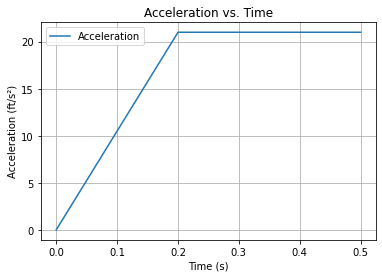

In [4]:
# Time settings
total_time = 0.5
transition_time = 0.2 

time_points = np.linspace(0, total_time, 1000)

acceleration_values = []

for t in time_points:
    if t < transition_time:
        # Acceleration rises linearly from 0 to 21 ft/s² during the transition time
        acceleration = (21 / transition_time) * t
    else:
        # After the transition, acceleration remains constant at 21 ft/s²
        acceleration = 21
        
    acceleration_values.append(acceleration)

# Plot the graph
plt.plot(time_points, acceleration_values, label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (ft/s²)')
plt.title('Acceleration vs. Time')
plt.legend()
plt.grid(True);